## 1. 그래프 임베딩

1. 노드 투 벡터

그래프 $G$의 각 노드를 벡터로 사상하는 과정이다.

In [1]:
# import
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt

Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 81.31it/s]


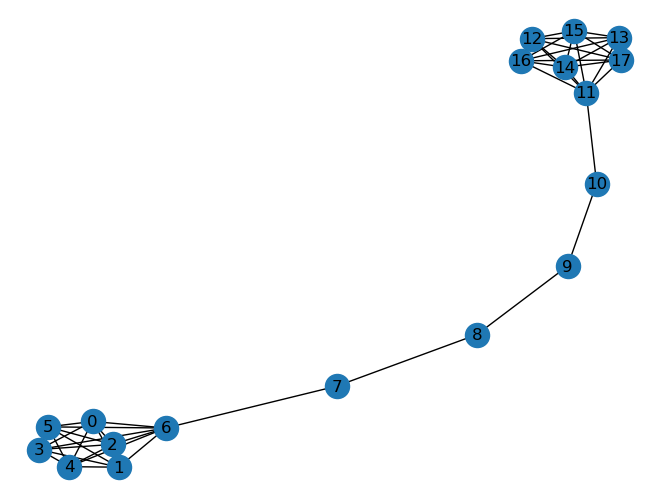

In [12]:
# generate the graph
G = nx.barbell_graph(m1 = 7, m2 = 4)
nx.draw(G, with_labels = True)

node2vec = Node2Vec(G, dimensions = 2)
model = node2vec.fit(window = 10)

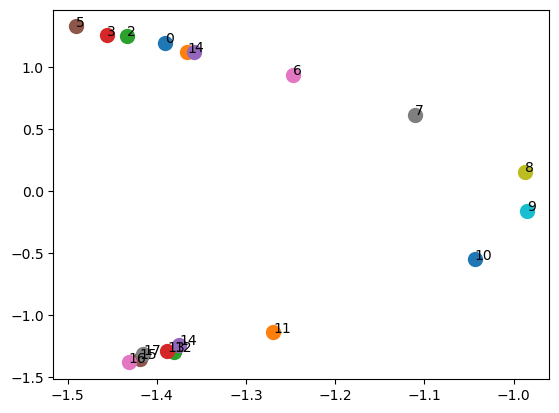

In [13]:
fig, ax = plt.subplots()
for x in G.nodes():
    v = model.wv.get_vector(str(x))
    ax.scatter(v[0], v[1], s = 100)
    ax.annotate(str(x), (v[0], v[1]), fontsize = 10)

2. 엣지 투 벡터

그래프 $G$의 각 엣지를 벡터로 사상하는 과정이다.

In [15]:
from node2vec.edges import HadamardEmbedder

In [17]:
edges_embs = HadamardEmbedder(keyed_vectors = model.wv)

[1.8996563 1.339046 ]
[1.9933916 1.5000429]
[2.025144  1.5015602]
[1.8888919 1.3430619]
[2.073357  1.5870388]
[1.7352302 1.117618 ]
[1.9568487 1.4078656]
[1.9880191 1.4092897]
[1.8542646 1.2605311]
[2.0353484 1.4895155]
[1.7034199 1.0489407]
[2.0861146 1.5787323]
[1.9457603 1.412088 ]
[2.1357791 1.6686039]
[1.7874724 1.1750574]
[1.9767541 1.4135164]
[2.1697998 1.6702917]
[1.8159448 1.176246 ]
[2.023815  1.4939828]
[1.6937675 1.0520866]
[1.8591774 1.2432055]
[1.3857952  0.57709515]
[1.0968919  0.09635069]
[ 0.9726926  -0.02491718]
[1.0283632  0.08804275]
[1.325131   0.62887293]
[1.7522022 1.4793802]
[1.7621906 1.4746257]
[1.7453905 1.4139502]
[1.8015869 1.5444819]
[1.8168219 1.575942 ]
[1.7964281 1.5002522]
[1.915996  1.6806946]
[1.8977296 1.6115401]
[1.9588307 1.7603127]
[1.9753956 1.7961692]
[1.9532218 1.7099023]
[1.9085475 1.6063608]
[1.969997  1.7546552]
[1.9866563 1.7903965]
[1.9643561 1.7044067]
[1.9512159 1.6824576]
[1.9677163 1.7167282]
[1.9456286 1.6342766]
[2.0310707 1.8752114

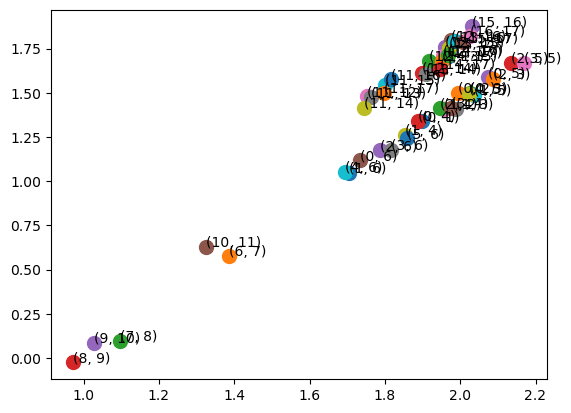

In [31]:
fig, ax = plt.subplots()
for x in G.edges():
    v = edges_embs[(str(x[0]), str(x[1]))]
    print(v)
    ax.scatter(v[0], v[1], s = 100)
    ax.annotate(str(x), (v[0], v[1]), fontsize = 10)

3. 그래프 투 벡터

그래프 $G$를 벡터로 사상하는 과정이다.

In [37]:
import random
import matplotlib.pyplot as plt
from karateclub import Graph2Vec

In [42]:
def generate_random():
    n = random.randint(5, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n, k, p)

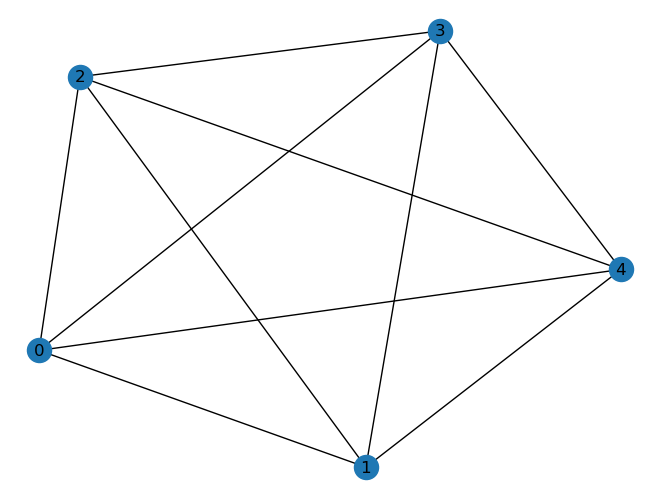

In [58]:
n_graphs = 20
Gs = [generate_random() for x in range(n_graphs)]

nx.draw(Gs[0], with_labels = True)  # 이런 그래프를 20개 만듬

In [59]:
model = Graph2Vec(dimensions = 2)
model.fit(Gs)

embeddings = model.get_embedding()
embeddings

array([[ 0.39873314,  0.47006887],
       [ 0.39795265, -0.3820579 ],
       [-0.4256804 , -0.22266194],
       [-0.21649885,  0.23089914],
       [-0.33456808, -0.42130584],
       [-0.237676  ,  0.4943574 ],
       [-0.23994648,  0.08116441],
       [ 0.43867725,  0.21749838],
       [-0.04836888,  0.4664757 ],
       [-0.30172732,  0.27959734],
       [ 0.20130846, -0.17435098],
       [-0.04755933, -0.43923914],
       [-0.00124519, -0.12866856],
       [ 0.4952499 , -0.23412952],
       [-0.33867228,  0.05649308],
       [-0.3914087 , -0.39788964],
       [-0.3284274 , -0.30351156],
       [-0.21912722, -0.09675982],
       [-0.12841439,  0.2912005 ],
       [ 0.3412901 , -0.22622126]], dtype=float32)

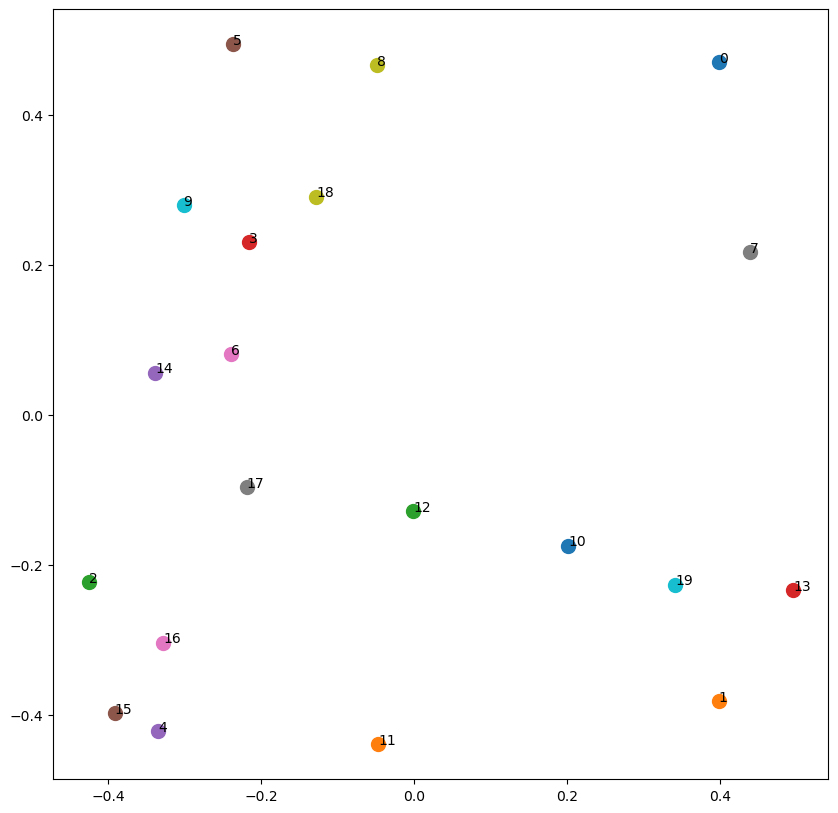

In [60]:
# 20개의 그래프를 2차원 유클리드 공간에 나타냄
fig, ax = plt.subplots(figsize = (10, 10))
for i, vec in enumerate(embeddings):
    ax.scatter(vec[0], vec[1], s = 100)
    ax.annotate(str(i), (vec[0], vec[1]), fontsize = 10)

그래프 임베딩 방법

* 변환: 새로운 노드가 추가될 때 변환 방법은 모델을 업데이트 (재학습)해 노드에 대한 정보를 추가함

* 귀납: 학습 중에 관찰되지 않았더라도 새로운 노드나 간선 또는 그래프로 일반화함

임베딩 방법은 인코더와 디코더 구조를 가진다. 

* 인코더: 입력을 임베딩 공간에 사상함

* 디코더: 학습된 임베딩에서 그래프에 대한 구조적 정보를 디코딩

> 표현학습 (representation learning)을 위한 많은 디코더는 일반적으로 원본 그래프에서 노드의 근접성 (거리)을 나타내는 실제 값에 노드 임베딩 쌍을 사상하도록 설계되어 있다.

## 2. 임베딩 알고리듬의 분류

1. 얕은 임베딩: 학습된 입력 데이터에 대한 임베딩 값만 학습하고 반환할 수 있다. 앞서 실습한 방법들이 이에 해당한다.

2. 그래프 자동 인코딩

3. 근방 집계

4. 그래프 정규화